In [45]:
# Predictive Modeling - ANN Model

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -------------------------------
# 1. Load Dataset
# -------------------------------      
data = pd.read_csv("../Data_Preparation/Preprocessed_Data/preprocessed_dataset.csv")
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


In [46]:
# 2. Check for Missing Values
print("\nChecking for Missing Values:\n")
print(data.isnull().sum())


Checking for Missing Values:

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


In [47]:
# 3. Basic Data Info

print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB
None


/var/folders/0s/98fp811s48129dsnq7vfx3sm0000gn/T/ipykernel_5088/3916701235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='Set2')


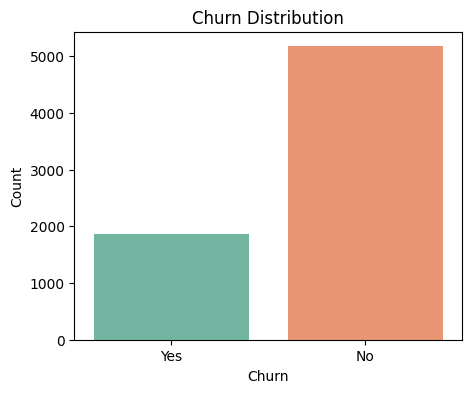

In [48]:
# 4. Exploratory Data Analysis (EDA)

# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

/var/folders/0s/98fp811s48129dsnq7vfx3sm0000gn/T/ipykernel_5088/3539866050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='pastel')


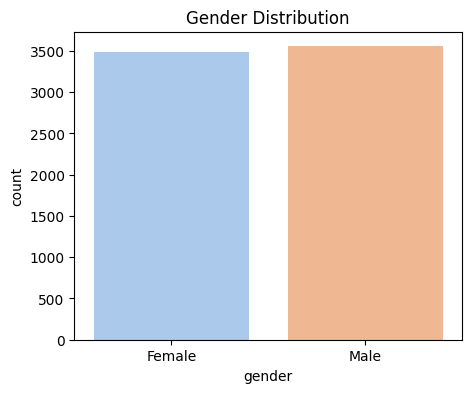

In [49]:
# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

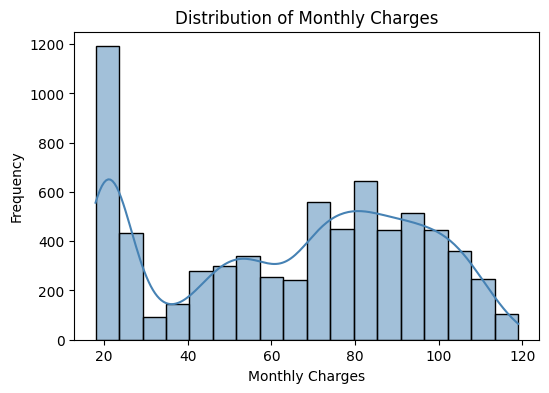

In [50]:
# Distribution of Monthly Charges
plt.figure(figsize=(6,4))
sns.histplot(data['MonthlyCharges'], kde=True, color='steelblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

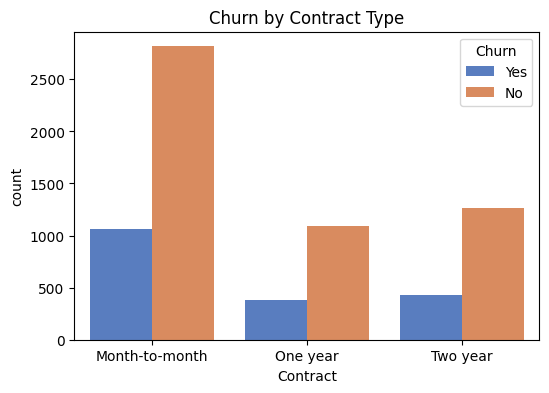

In [51]:
# Churn by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Contract', hue='Churn', palette='muted')
plt.title('Churn by Contract Type')
plt.show()

In [52]:

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [53]:
# 6. Split Features and Target

X = data.drop("Churn", axis=1)
y = data["Churn"]


# 7. Scale Numerical Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 8. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 5634, Testing Samples: 1409


In [54]:
# 9. Build ANN Model Architecture

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/jiteshakaveeti/CHURN-PREDICTION/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# 10. Train the Model

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7384 - loss: 0.5240 - val_accuracy: 0.7888 - val_loss: 0.4493
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7657 - loss: 0.4842 - val_accuracy: 0.8012 - val_loss: 0.4371
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7664 - loss: 0.4712 - val_accuracy: 0.7950 - val_loss: 0.4360
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.7746 - loss: 0.4643 - val_accuracy: 0.8004 - val_loss: 0.4343
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7781 - loss: 0.4583 - val_accuracy: 0.7995 - val_loss: 0.4348
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7775 - loss: 0.4593 - val_accuracy: 0.8030 - val_loss: 0.4332
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7823 - loss: 0.4558 - val_accuracy: 0.7933 - val_loss: 0.4348
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.7841 - loss: 0.4547 - va

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1035
           1       0.65      0.39      0.49       374

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.67      1409
weighted avg       0.77      0.78      0.76      1409

Accuracy: 0.7821149751596878
ROC AUC Score: 0.6570229145676716


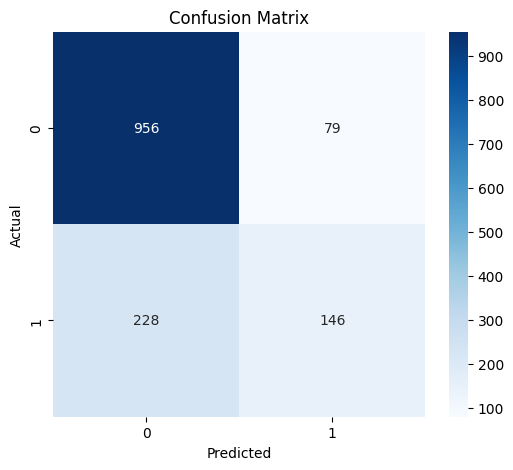

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


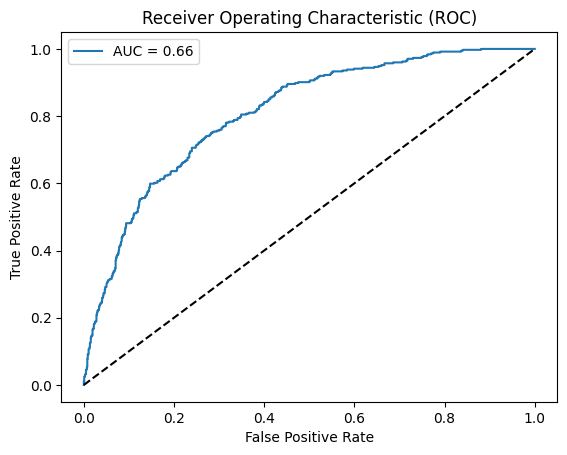

In [56]:
# 11. Evaluate Model Performance

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()